# Librería

In [1]:
# Tratamiento de datos
import re
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix

# Data

In [2]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(URL, index_col='PassengerId')

# Primera Exploración

In [3]:
df = titanic.copy()

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isna().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [7]:
df[df.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [8]:
df[df['Name'].duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


# Mini EDA

In [9]:
# sns.pairplot(df, hue='Survived')

In [10]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [11]:
df[df['Ticket'] == '347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [12]:
df[df['Name'].str.contains('Miss')]['Age'].mean()

21.773972602739725

In [13]:
df[df['Name'].str.contains('Mrs')]['Age'].mean()

35.642857142857146

In [14]:
df[df['Sex'] == 'female']['Age'].mean()

27.915708812260537

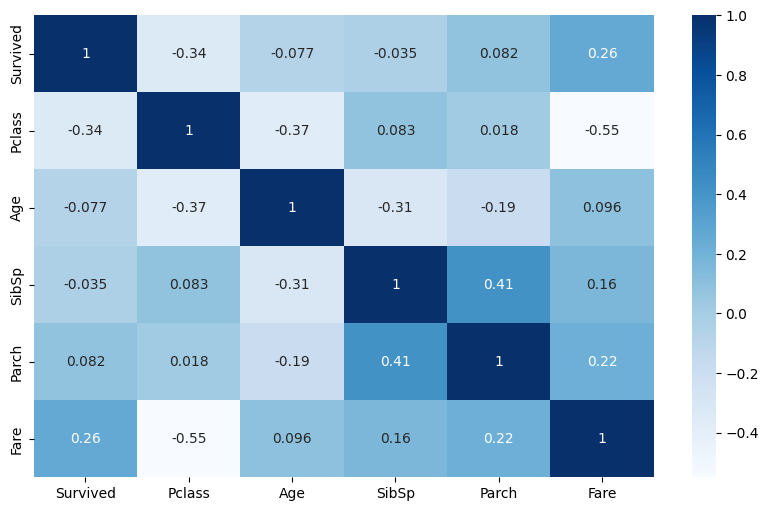

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues');

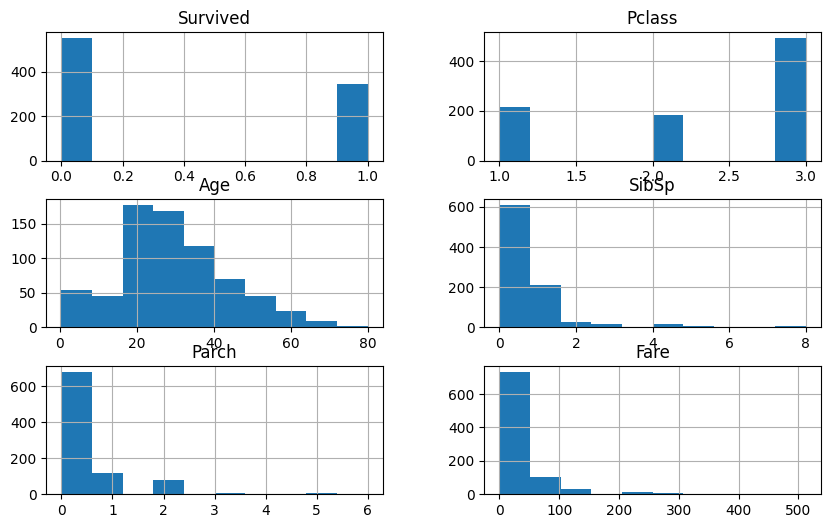

In [16]:
df.hist(figsize=(10, 6));

<Axes: xlabel='Survived', ylabel='percent'>

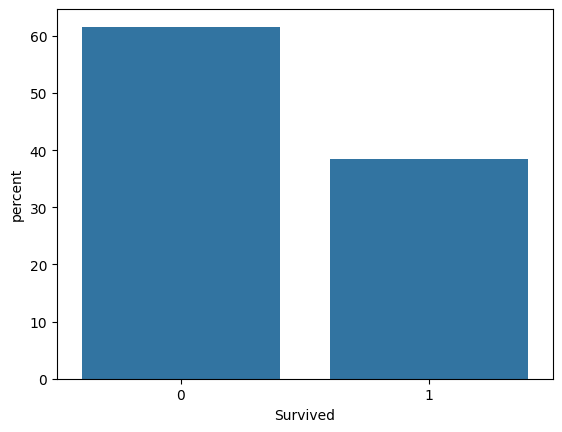

In [17]:
sns.countplot(x='Survived',data=df, stat='percent')

<Axes: xlabel='Embarked', ylabel='percent'>

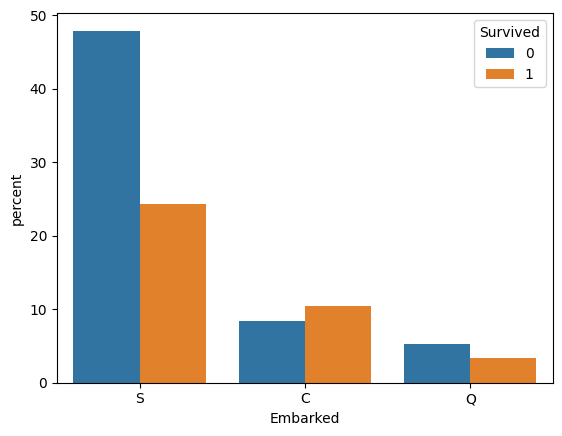

In [18]:
sns.countplot(x='Embarked',data=df, hue='Survived', stat='percent')

<Axes: xlabel='Pclass', ylabel='percent'>

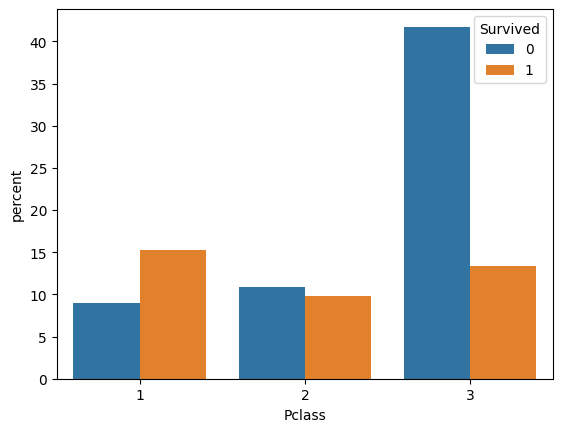

In [19]:
sns.countplot(x='Pclass',data=df, hue='Survived', stat='percent')

<Axes: xlabel='Sex', ylabel='percent'>

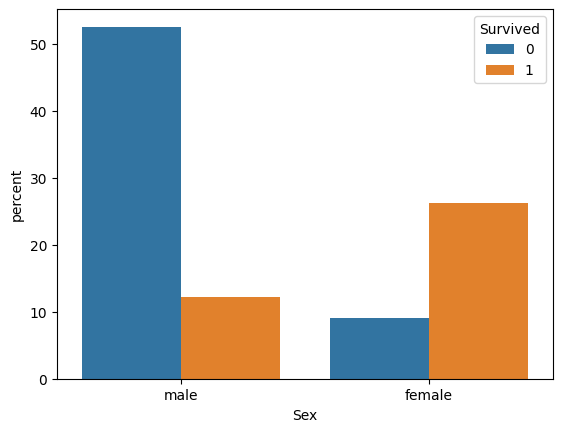

In [20]:
sns.countplot(x='Sex',data=df, hue='Survived', stat='percent')

<Axes: xlabel='Fare', ylabel='Count'>

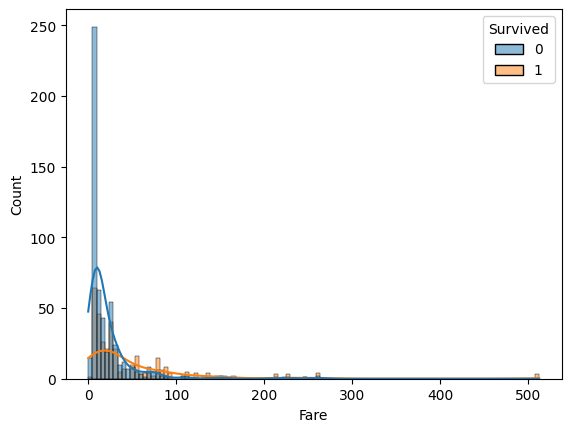

In [21]:
sns.histplot(x='Fare',data=df, hue='Survived', kde=True)

<Axes: xlabel='Survived', ylabel='count'>

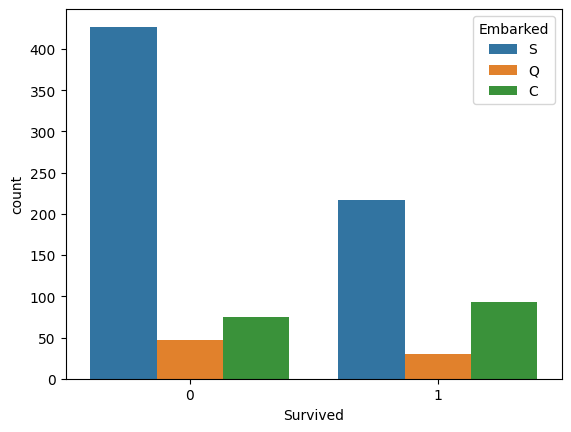

In [22]:
sns.countplot(x='Survived',data=df, hue='Embarked')

# Tratamiento de missing y valores atípicos

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.drop(columns=['Ticket', 'Cabin'], inplace=True)

In [25]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [26]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [28]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

# Feature Engineer

In [29]:
df["Acompaniantes"] = df["SibSp"] + df["Parch"]
df['Acompaniantes'] = np.where(df['Acompaniantes'] > 0, 1, 0)
df.drop(columns=["SibSp", "Parch"], inplace=True)

In [30]:
def clasificar_nombre(nombre):
    if ', Master.' in nombre:
        return 'kids'
    elif ', Miss.' in nombre:
        return 'miss'
    else:
        return 'adults'

df['Rango_edad'] = df['Name'].apply(clasificar_nombre)

mean_male = df[df['Sex'] == 'male']['Age'].mean()
mean_female = df[df['Sex'] == 'female']['Age'].mean()
mean_kids = df[df['Rango_edad'] == 'kids']['Age'].mean()
mean_miss = df[df['Rango_edad'] == 'miss']['Age'].mean()

is_male = df['Sex'] == 'male'
is_female = df['Sex'] == 'female'
is_kids = df['Rango_edad'] == 'kids'
is_miss = df['Rango_edad'] == 'miss'

is_nan = df['Age'].isna()

df.loc[is_male & is_nan, 'Age'] = mean_male
df.loc[is_female & is_nan, 'Age'] = mean_female
df.loc[is_kids & is_nan, 'Age'] = mean_kids
df.loc[is_miss & is_nan, 'Age'] = mean_miss

df.drop(columns=['Rango_edad','Name'], inplace=True)

In [31]:
df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
df.rename(columns={'Sex':'is_male'}, inplace=True)

In [32]:
df.columns

Index(['Survived', 'Pclass', 'is_male', 'Age', 'Fare', 'Embarked',
       'Acompaniantes'],
      dtype='object')

# División de Datos

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=73)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 6)
(179, 6)
(712,)
(179,)


In [35]:
X_train

,Pclass,is_male,Age,Fare,Embarked,Acompaniantes
PassengerId,,,,,,
801,2,1,34.0,13.0000,S,0
381,1,0,42.0,227.5250,C,0
705,3,1,26.0,7.8542,S,1
683,3,1,20.0,9.2250,S,0
514,1,0,54.0,59.4000,C,1
...,...,...,...,...,...,...
324,2,0,22.0,29.0000,S,1
393,3,1,28.0,7.9250,S,1
785,3,1,25.0,7.0500,S,0


# Escalado + Dummies

In [36]:
X_train.columns

Index(['Pclass', 'is_male', 'Age', 'Fare', 'Embarked', 'Acompaniantes'], dtype='object')

In [37]:
X_train['Fare'] = np.log(X_train['Fare']+1)
X_test['Fare'] = np.log(X_test['Fare']+1)

esc = MinMaxScaler()
X_train[['Age', 'Fare']] = esc.fit_transform(X_train[['Age', 'Fare']])
X_test[['Age', 'Fare']] = esc.transform(X_test[['Age', 'Fare']])

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe.fit(X_train[['Pclass','Embarked']])

transformed_X_train = ohe.transform(X_train[['Pclass','Embarked']])
transformed_df = pd.DataFrame(transformed_X_train, columns=ohe.get_feature_names_out(['Pclass','Embarked']), index=X_train.index)
X_train_sca_ohe = pd.concat([X_train, transformed_df], axis=1).drop(columns=['Pclass','Embarked'])

transformed_X_val = ohe.transform(X_test[['Pclass','Embarked']])
transformed_df = pd.DataFrame(transformed_X_val, columns=ohe.get_feature_names_out(['Pclass','Embarked']), index=X_test.index)
X_test_sca_ohe = pd.concat([X_test, transformed_df], axis=1).drop(columns=['Pclass','Embarked'])


c:\Users\jamr1\Documents\Data_Science\GITHUB\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Cross-Validation + Base-Lines

In [38]:
modelos = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False)
    
}

# Define las métricas a usar
metricas = ["accuracy", "f1_macro", "recall_macro", "precision_macro", "roc_auc_ovr"]

resultados_dict = {}

for nombre_modelo, modelo in modelos.items():
    cv_resultados = cross_validate(modelo, X_train_sca_ohe, y_train, cv=5, scoring=metricas)
    
    for metrica in metricas:
        clave = f"{nombre_modelo}_{metrica}"
        resultados_dict[clave] = cv_resultados[f"test_{metrica}"].mean()

# Convertir el diccionario de resultados en DataFrame
resultados_df = pd.DataFrame([resultados_dict])



In [39]:
resultados_df.T.sort_values(by=0, ascending=False)

,0
CatBoost_roc_auc_ovr,0.866210
RandomForestClassifier_roc_auc_ovr,0.846798
XGBoost_roc_auc_ovr,0.845902
Logistic Regression_roc_auc_ovr,0.844231
CatBoost_precision_macro,0.824562
CatBoost_accuracy,0.824456
CatBoost_f1_macro,0.811321
XGBoost_accuracy,0.808983
CatBoost_recall_macro,0.806147
XGBoost_precision_macro,0.804645


# Entrenar

In [40]:
catb = CatBoostClassifier(verbose=False)
catb.fit(X_train_sca_ohe, y_train)

# Predicción

In [41]:
y_pred = catb.predict(X_test_sca_ohe)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

# Validación del modelo

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.82      0.75      0.79        61

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



## Optimización del modelo

In [43]:
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}
catb = CatBoostClassifier(verbose=False)

grid_search = GridSearchCV(estimator=catb, param_grid=param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train_sca_ohe, y_train)

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

In [44]:
print(f"Best score (Accuracy): {grid_search.best_score_}")
print(f"Best parameters: {best_parameters}")

Best score (Accuracy): 0.8272287818080818
Best parameters: {'depth': 10, 'iterations': 50, 'learning_rate': 0.05}


In [45]:
print(classification_report(y_test, grid_search.predict(X_test_sca_ohe)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       118
           1       0.81      0.69      0.74        61

    accuracy                           0.84       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.84      0.84      0.83       179

